In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy import cluster
%matplotlib inline

In [3]:
#读取文件
df = pd.read_csv('species_annotation.txt',sep='\t',index_col=0)
df

,top_taxonomy_name,distance,pvalue,matching,full_taxonomy,taxonomic_subspecies,taxonomic_species,taxonomic_genus,taxonomic_family,taxonomic_order,...,taxonomic_parvorder,taxonomic_varietas,taxonomic_infraorder,taxonomic_species subgroup,taxonomic_superorder,taxonomic_superfamily,taxonomic_species group,taxonomic_subtribe,taxonomic_subgenus,taxonomic_subfamily
sample,,,,,,,,,,,,,,,,,,,,,
bin_concoct.111,Alloscardovia omnicolens F0580,0.013482,0.000000e+00,270/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bin_concoct.111,Alloscardovia omnicolens DSM 21503,0.013900,0.000000e+00,267/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bin_concoct.111,Nomascus leucogenys,0.220090,5.272220e-07,6/400,Eukaryota; Opisthokonta; Metazoa; Eumetazoa; B...,NaN,Nomascus leucogenys,Nomascus,Hylobatidae,Primates,...,Catarrhini,NaN,Simiiformes,NaN,Euarchontoglires,Hominoidea,NaN,NaN,NaN,NaN
bin_concoct.111,Gardnerella vaginalis 1500E,0.220090,1.109830e-09,6/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Gardnerella vaginalis,Gardnerella,Bifidobacteriaceae,Bifidobacteriales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bin_concoct.111,Vibrio vulnificus MO6-24/O,0.220090,4.699090e-08,6/400,Bacteria; Proteobacteria; Gammaproteobacteria;...,NaN,Vibrio vulnificus,Vibrio,Vibrionaceae,Vibrionales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bin_metabat.71,Porphyromonas catoniae ATCC 51270,0.035823,0.000000e+00,157/400,Bacteria; FCB group; Bacteroidetes/Chlorobi gr...,NaN,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bin_metabat.71,Porphyromonas catoniae F0037,0.039432,0.000000e+00,145/400,Bacteria; FCB group; Bacteroidetes/Chlorobi gr...,NaN,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bin_metabat.71,Hyphomonas chukchiensis,0.245123,4.330890e-06,4/400,Bacteria; Proteobacteria; Alphaproteobacteria;...,NaN,Hyphomonas chukchiensis,Hyphomonas,Hyphomonadaceae,Rhodobacterales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#df以top_taxonomy_name列为索引
df = df.set_index('top_taxonomy_name')
df

,distance,pvalue,matching,full_taxonomy,taxonomic_subspecies,taxonomic_species,taxonomic_genus,taxonomic_family,taxonomic_order,taxonomic_class,...,taxonomic_parvorder,taxonomic_varietas,taxonomic_infraorder,taxonomic_species subgroup,taxonomic_superorder,taxonomic_superfamily,taxonomic_species group,taxonomic_subtribe,taxonomic_subgenus,taxonomic_subfamily
top_taxonomy_name,,,,,,,,,,,,,,,,,,,,,
Alloscardovia omnicolens F0580,0.013482,0.000000e+00,270/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alloscardovia omnicolens DSM 21503,0.013900,0.000000e+00,267/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nomascus leucogenys,0.220090,5.272220e-07,6/400,Eukaryota; Opisthokonta; Metazoa; Eumetazoa; B...,NaN,Nomascus leucogenys,Nomascus,Hylobatidae,Primates,Mammalia,...,Catarrhini,NaN,Simiiformes,NaN,Euarchontoglires,Hominoidea,NaN,NaN,NaN,NaN
Gardnerella vaginalis 1500E,0.220090,1.109830e-09,6/400,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,Gardnerella vaginalis,Gardnerella,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vibrio vulnificus MO6-24/O,0.220090,4.699090e-08,6/400,Bacteria; Proteobacteria; Gammaproteobacteria;...,NaN,Vibrio vulnificus,Vibrio,Vibrionaceae,Vibrionales,Gammaproteobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Porphyromonas catoniae ATCC 51270,0.035823,0.000000e+00,157/400,Bacteria; FCB group; Bacteroidetes/Chlorobi gr...,NaN,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Porphyromonas catoniae F0037,0.039432,0.000000e+00,145/400,Bacteria; FCB group; Bacteroidetes/Chlorobi gr...,NaN,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hyphomonas chukchiensis,0.245123,4.330890e-06,4/400,Bacteria; Proteobacteria; Alphaproteobacteria;...,NaN,Hyphomonas chukchiensis,Hyphomonas,Hyphomonadaceae,Rhodobacterales,Alphaproteobacteria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#列出df的列名
df.columns

Index(['distance', 'pvalue', 'matching', 'full_taxonomy',
       'taxonomic_subspecies', 'taxonomic_species', 'taxonomic_genus',
       'taxonomic_family', 'taxonomic_order', 'taxonomic_class',
       'taxonomic_phylum', 'taxonomic_kingdom', 'taxonomic_superkingdom',
       'subspecies', 'serovar', 'plasmid', 'bioproject', 'biosample', 'taxid',
       'assembly_accession', 'match_id', 'taxonomic_subphylum',
       'taxonomic_subclass', 'taxonomic_tribe', 'taxonomic_subkingdom',
       'taxonomic_suborder', 'taxonomic_parvorder', 'taxonomic_varietas',
       'taxonomic_infraorder', 'taxonomic_species subgroup',
       'taxonomic_superorder', 'taxonomic_superfamily',
       'taxonomic_species group', 'taxonomic_subtribe', 'taxonomic_subgenus',
       'taxonomic_subfamily'],
      dtype='object')

In [6]:
#提取df的'taxonomic_species', 'taxonomic_genus','taxonomic_family', 'taxonomic_order', 'taxonomic_class','taxonomic_phylum'列
df1 = df[['taxonomic_species', 'taxonomic_genus','taxonomic_family', 'taxonomic_order', 'taxonomic_class','taxonomic_phylum']]
df1

,taxonomic_species,taxonomic_genus,taxonomic_family,taxonomic_order,taxonomic_class,taxonomic_phylum
top_taxonomy_name,,,,,,
Alloscardovia omnicolens F0580,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,Actinobacteria
Alloscardovia omnicolens DSM 21503,Alloscardovia omnicolens,Alloscardovia,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,Actinobacteria
Nomascus leucogenys,Nomascus leucogenys,Nomascus,Hylobatidae,Primates,Mammalia,Chordata
Gardnerella vaginalis 1500E,Gardnerella vaginalis,Gardnerella,Bifidobacteriaceae,Bifidobacteriales,Actinobacteria,Actinobacteria
Vibrio vulnificus MO6-24/O,Vibrio vulnificus,Vibrio,Vibrionaceae,Vibrionales,Gammaproteobacteria,Proteobacteria
...,...,...,...,...,...,...
Porphyromonas catoniae ATCC 51270,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,Bacteroidetes
Porphyromonas catoniae F0037,Porphyromonas catoniae,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,Bacteroidetes
Hyphomonas chukchiensis,Hyphomonas chukchiensis,Hyphomonas,Hyphomonadaceae,Rhodobacterales,Alphaproteobacteria,Proteobacteria


In [7]:
data = pd.read_csv('newples2.txt',sep='\t',index_col=0)
data

,HC-1-post,HC-1-pre,HC-2-post,HC-2-pre,HC-3-post,HC-3-pre,OSCC-1-post,OSCC-1-pre,OSCC-2-post,OSCC-2-pre,OSCC-3-post,OSCC-3-pre,OSCC-4-post,OSCC-4-pre
groups,,,,,,,,,,,,,,
Bacillus cereus BAG2X1-3,4.042226,32.677411,0.000000,0.000000,0.000501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fusobacterium nucleatum subsp. animalis 7_1,0.638463,0.030334,0.051990,0.038786,1.344056,0.086259,0.000000,0.111361,0.016038,0.026896,0.000000,0.000000,0.000000,0.032828
Actinomyces dentalis DSM 19115,0.003712,0.000000,0.000000,0.232150,0.004907,0.058063,0.030914,0.942614,0.000000,0.000000,0.018150,0.723313,0.000000,7.276823
Comamonadaceae bacterium A1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.221492
Capnocytophaga ochracea F0287,0.075325,0.329979,0.000000,0.140356,0.015108,0.167883,0.000000,0.199193,0.000000,0.201194,0.000000,0.000000,0.000000,0.177756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Arcobacter butzleri ED-1,0.193216,0.080083,1.939759,0.424290,0.216507,0.025222,0.029105,0.422254,0.012426,0.280935,0.000000,0.000000,0.058328,0.333574
Gemella morbillorum M424,0.305752,0.196224,0.000000,0.031668,0.298741,0.562199,0.612423,1.568907,0.133896,0.366383,0.307443,0.177337,1.654459,0.735955
Streptococcus australis ATCC 700641,1.282748,0.098981,0.136933,0.072197,0.000000,0.000000,36.778263,1.028270,0.000000,0.000000,1.969677,0.274663,0.571681,8.231987


In [8]:
#data删除最后一行
dataa = data.drop(data.index[-1])
dataa

,HC-1-post,HC-1-pre,HC-2-post,HC-2-pre,HC-3-post,HC-3-pre,OSCC-1-post,OSCC-1-pre,OSCC-2-post,OSCC-2-pre,OSCC-3-post,OSCC-3-pre,OSCC-4-post,OSCC-4-pre
groups,,,,,,,,,,,,,,
Bacillus cereus BAG2X1-3,4.042226,32.677411,0.000000,0.000000,0.000501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fusobacterium nucleatum subsp. animalis 7_1,0.638463,0.030334,0.051990,0.038786,1.344056,0.086259,0.000000,0.111361,0.016038,0.026896,0.000000,0.000000,0.000000,0.032828
Actinomyces dentalis DSM 19115,0.003712,0.000000,0.000000,0.232150,0.004907,0.058063,0.030914,0.942614,0.000000,0.000000,0.018150,0.723313,0.000000,7.276823
Comamonadaceae bacterium A1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.221492
Capnocytophaga ochracea F0287,0.075325,0.329979,0.000000,0.140356,0.015108,0.167883,0.000000,0.199193,0.000000,0.201194,0.000000,0.000000,0.000000,0.177756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Veillonella sp. 3_1_44,4.077179,2.073833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arcobacter butzleri ED-1,0.193216,0.080083,1.939759,0.424290,0.216507,0.025222,0.029105,0.422254,0.012426,0.280935,0.000000,0.000000,0.058328,0.333574
Gemella morbillorum M424,0.305752,0.196224,0.000000,0.031668,0.298741,0.562199,0.612423,1.568907,0.133896,0.366383,0.307443,0.177337,1.654459,0.735955


In [9]:
# 计算每个样本的总丰度  
total_abundance = dataa.sum(axis=0)  

# 计算相对丰度  
data1 = dataa.div(total_abundance, axis=1)
data1

,HC-1-post,HC-1-pre,HC-2-post,HC-2-pre,HC-3-post,HC-3-pre,OSCC-1-post,OSCC-1-pre,OSCC-2-post,OSCC-2-pre,OSCC-3-post,OSCC-3-pre,OSCC-4-post,OSCC-4-pre
groups,,,,,,,,,,,,,,
Bacillus cereus BAG2X1-3,0.026776,0.281768,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fusobacterium nucleatum subsp. animalis 7_1,0.004229,0.000262,0.000567,0.000892,0.006718,0.001597,0.000000,0.000583,0.000108,0.000376,0.000000,0.000000,0.000000,0.000296
Actinomyces dentalis DSM 19115,0.000025,0.000000,0.000000,0.005339,0.000025,0.001075,0.000192,0.004937,0.000000,0.000000,0.000029,0.011706,0.000000,0.065573
Comamonadaceae bacterium A1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020018
Capnocytophaga ochracea F0287,0.000499,0.002845,0.000000,0.003228,0.000076,0.003108,0.000000,0.001043,0.000000,0.002816,0.000000,0.000000,0.000000,0.001602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Veillonella sp. 3_1_44,0.027008,0.017882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arcobacter butzleri ED-1,0.001280,0.000691,0.021145,0.009758,0.001082,0.000467,0.000181,0.002212,0.000084,0.003932,0.000000,0.000000,0.000234,0.003006
Gemella morbillorum M424,0.002025,0.001692,0.000000,0.000728,0.001493,0.010409,0.003807,0.008218,0.000905,0.005128,0.000500,0.002870,0.006642,0.006632


In [10]:
#将data和df以索引为标准合并，取交集
dataf = pd.merge(data1,df1,left_index=True,right_index=True)
dataf

,HC-1-post,HC-1-pre,HC-2-post,HC-2-pre,HC-3-post,HC-3-pre,OSCC-1-post,OSCC-1-pre,OSCC-2-post,OSCC-2-pre,OSCC-3-post,OSCC-3-pre,OSCC-4-post,OSCC-4-pre,taxonomic_species,taxonomic_genus,taxonomic_family,taxonomic_order,taxonomic_class,taxonomic_phylum
Acidovorax sp. MR-S7,0.000266,0.003129,0.000000,0.001692,0.000000,0.005346,0.000061,0.000000,0.000079,0.008032,0.000000,0.000000,0.000000,0.009702,Acidovorax sp. MR-S7,Acidovorax,Comamonadaceae,Burkholderiales,Betaproteobacteria,Proteobacteria
Acidovorax sp. MR-S7,0.000266,0.003129,0.000000,0.001692,0.000000,0.005346,0.000061,0.000000,0.000079,0.008032,0.000000,0.000000,0.000000,0.009702,Acidovorax sp. MR-S7,Acidovorax,Comamonadaceae,Burkholderiales,Betaproteobacteria,Proteobacteria
Acinetobacter sp. 1578804,0.002766,0.000908,0.000738,0.000532,0.002212,0.003437,0.000000,0.000000,0.002069,0.012538,0.000000,0.001411,0.000000,0.001305,Acinetobacter sp. 1578804,Acinetobacter,Moraxellaceae,Pseudomonadales,Gammaproteobacteria,Proteobacteria
Actinomyces dentalis DSM 19115,0.000025,0.000000,0.000000,0.005339,0.000025,0.001075,0.000192,0.004937,0.000000,0.000000,0.000029,0.011706,0.000000,0.065573,Actinomyces dentalis,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
Actinomyces dentalis DSM 19115,0.000025,0.000000,0.000000,0.005339,0.000025,0.001075,0.000192,0.004937,0.000000,0.000000,0.000029,0.011706,0.000000,0.065573,Actinomyces dentalis,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Veillonella sp. 3_1_44,0.027008,0.017882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Veillonella sp. 3_1_44,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes
Veillonella sp. 6_1_27,0.002326,0.001250,0.019633,0.013667,0.007102,0.008315,0.000699,0.004110,0.006562,0.001141,0.175269,0.087272,0.012815,0.005661,Veillonella sp. 6_1_27,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes
Veillonella sp. 6_1_27,0.002326,0.001250,0.019633,0.013667,0.007102,0.008315,0.000699,0.004110,0.006562,0.001141,0.175269,0.087272,0.012815,0.005661,Veillonella sp. 6_1_27,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes
Veillonella sp. 6_1_27,0.002326,0.001250,0.019633,0.013667,0.007102,0.008315,0.000699,0.004110,0.006562,0.001141,0.175269,0.087272,0.012815,0.005661,Veillonella sp. 6_1_27,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes


In [11]:
#dataf重复的行只取第一个行
dataf0 = dataf.drop_duplicates()
dataf0

,HC-1-post,HC-1-pre,HC-2-post,HC-2-pre,HC-3-post,HC-3-pre,OSCC-1-post,OSCC-1-pre,OSCC-2-post,OSCC-2-pre,OSCC-3-post,OSCC-3-pre,OSCC-4-post,OSCC-4-pre,taxonomic_species,taxonomic_genus,taxonomic_family,taxonomic_order,taxonomic_class,taxonomic_phylum
Acidovorax sp. MR-S7,0.000266,0.003129,0.000000,0.001692,0.000000,0.005346,0.000061,0.000000,0.000079,0.008032,0.000000,0.000000,0.000000,0.009702,Acidovorax sp. MR-S7,Acidovorax,Comamonadaceae,Burkholderiales,Betaproteobacteria,Proteobacteria
Acinetobacter sp. 1578804,0.002766,0.000908,0.000738,0.000532,0.002212,0.003437,0.000000,0.000000,0.002069,0.012538,0.000000,0.001411,0.000000,0.001305,Acinetobacter sp. 1578804,Acinetobacter,Moraxellaceae,Pseudomonadales,Gammaproteobacteria,Proteobacteria
Actinomyces dentalis DSM 19115,0.000025,0.000000,0.000000,0.005339,0.000025,0.001075,0.000192,0.004937,0.000000,0.000000,0.000029,0.011706,0.000000,0.065573,Actinomyces dentalis,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
Actinomyces dentalis DSM 19115,0.000656,0.000326,0.000000,0.007578,0.000271,0.010925,0.000077,0.004216,0.000000,0.000000,0.000157,0.031777,0.000000,0.011141,Actinomyces dentalis,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
Actinomyces sp. ICM47,0.010164,0.025993,0.001300,0.009780,0.014678,0.129033,0.000000,0.000719,0.000826,0.005167,0.000226,0.001578,0.000000,0.000352,Actinomyces sp. ICM47,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Streptomyces griseorubens,0.000286,0.005394,0.000154,0.005589,0.000485,0.042350,0.000000,0.002332,0.000000,0.004618,0.000000,0.003761,0.000000,0.001960,Streptomyces griseorubens,Streptomyces,Streptomycetaceae,Streptomycetales,Actinobacteria,Actinobacteria
Tyzzerella nexilis DSM 1787,0.034854,0.020114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001963,Tyzzerella nexilis,Tyzzerella,Lachnospiraceae,Clostridiales,Clostridia,Firmicutes
Veillonella sp. 3_1_44,0.027008,0.017882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Veillonella sp. 3_1_44,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes
Veillonella sp. 6_1_27,0.002326,0.001250,0.019633,0.013667,0.007102,0.008315,0.000699,0.004110,0.006562,0.001141,0.175269,0.087272,0.012815,0.005661,Veillonella sp. 6_1_27,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes


In [12]:
#列出dataf0的列名
dataf0.columns

Index(['HC-1-post', 'HC-1-pre', 'HC-2-post', 'HC-2-pre', 'HC-3-post',
       'HC-3-pre', 'OSCC-1-post', 'OSCC-1-pre', 'OSCC-2-post', 'OSCC-2-pre',
       'OSCC-3-post', 'OSCC-3-pre', 'OSCC-4-post', 'OSCC-4-pre',
       'taxonomic_species', 'taxonomic_genus', 'taxonomic_family',
       'taxonomic_order', 'taxonomic_class', 'taxonomic_phylum'],
      dtype='object')

In [13]:
#dataf1保存为txt文件
dataf0.to_csv('dataf1.txt',sep='\t')

In [14]:
dataf1=dataf0[['taxonomic_genus', 'HC-1-pre', 'HC-2-pre','HC-3-pre','HC-1-post','HC-2-post',  'HC-3-post',
         'OSCC-1-pre',  'OSCC-2-pre','OSCC-3-pre','OSCC-4-pre',
       'OSCC-1-post','OSCC-2-post','OSCC-3-post',  'OSCC-4-post', ]]
dataf1

,taxonomic_genus,HC-1-pre,HC-2-pre,HC-3-pre,HC-1-post,HC-2-post,HC-3-post,OSCC-1-pre,OSCC-2-pre,OSCC-3-pre,OSCC-4-pre,OSCC-1-post,OSCC-2-post,OSCC-3-post,OSCC-4-post
Acidovorax sp. MR-S7,Acidovorax,0.003129,0.001692,0.005346,0.000266,0.000000,0.000000,0.000000,0.008032,0.000000,0.009702,0.000061,0.000079,0.000000,0.000000
Acinetobacter sp. 1578804,Acinetobacter,0.000908,0.000532,0.003437,0.002766,0.000738,0.002212,0.000000,0.012538,0.001411,0.001305,0.000000,0.002069,0.000000,0.000000
Actinomyces dentalis DSM 19115,Actinomyces,0.000000,0.005339,0.001075,0.000025,0.000000,0.000025,0.004937,0.000000,0.011706,0.065573,0.000192,0.000000,0.000029,0.000000
Actinomyces dentalis DSM 19115,Actinomyces,0.000326,0.007578,0.010925,0.000656,0.000000,0.000271,0.004216,0.000000,0.031777,0.011141,0.000077,0.000000,0.000157,0.000000
Actinomyces sp. ICM47,Actinomyces,0.025993,0.009780,0.129033,0.010164,0.001300,0.014678,0.000719,0.005167,0.001578,0.000352,0.000000,0.000826,0.000226,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Streptomyces griseorubens,Streptomyces,0.005394,0.005589,0.042350,0.000286,0.000154,0.000485,0.002332,0.004618,0.003761,0.001960,0.000000,0.000000,0.000000,0.000000
Tyzzerella nexilis DSM 1787,Tyzzerella,0.020114,0.000000,0.000000,0.034854,0.000000,0.000000,0.000000,0.000000,0.000000,0.001963,0.000000,0.000000,0.000000,0.000000
Veillonella sp. 3_1_44,Veillonella,0.017882,0.000000,0.000000,0.027008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Veillonella sp. 6_1_27,Veillonella,0.001250,0.013667,0.008315,0.002326,0.019633,0.007102,0.004110,0.001141,0.087272,0.005661,0.000699,0.006562,0.175269,0.012815


In [15]:
#dataf1中Phylum列中相同的值合并
dataf2=dataf1.groupby('taxonomic_genus').sum()
dataf2

,HC-1-pre,HC-2-pre,HC-3-pre,HC-1-post,HC-2-post,HC-3-post,OSCC-1-pre,OSCC-2-pre,OSCC-3-pre,OSCC-4-pre,OSCC-1-post,OSCC-2-post,OSCC-3-post,OSCC-4-post
taxonomic_genus,,,,,,,,,,,,,,
Acidovorax,0.003129,0.001692,0.005346,0.000266,0.000000,0.000000,0.000000,0.008032,0.000000,0.009702,0.000061,0.000079,0.000000,0.000000e+00
Acinetobacter,0.000908,0.000532,0.003437,0.002766,0.000738,0.002212,0.000000,0.012538,0.001411,0.001305,0.000000,0.002069,0.000000,0.000000e+00
Actinomyces,0.027476,0.054250,0.168549,0.012657,0.004392,0.017774,0.010314,0.010391,0.077446,0.082634,0.000355,0.000854,0.007486,0.000000e+00
Alloscardovia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000589,0.017837,0.000000,0.005595,0.000000e+00
Arcobacter,0.003516,0.030190,0.011415,0.006689,0.024309,0.004695,0.008736,0.038379,0.000000,0.039534,0.000569,0.000529,0.000000,2.545028e-04
Bacillus,0.343903,0.000000,0.003622,0.090000,0.000000,0.000993,0.001996,0.044514,0.055631,0.005665,0.000000,0.000312,0.000000,0.000000e+00
Bradyrhizobium,0.005843,0.000000,0.000000,0.010958,0.000000,0.000000,0.000000,0.000482,0.000000,0.000000,0.000000,0.000937,0.000000,0.000000e+00
Campylobacter,0.009102,0.013227,0.018093,0.000732,0.000000,0.000959,0.003507,0.024933,0.006752,0.122420,0.000239,0.000229,0.000000,0.000000e+00
Capnocytophaga,0.024162,0.029577,0.023310,0.005330,0.000842,0.000619,0.041060,0.067898,0.016784,0.085161,0.000791,0.000524,0.000000,2.873012e-04


In [16]:
#dataf2计算每列的和形成新的行
datah = dataf2.sum(axis=0)
datah

HC-1-pre       0.994043
HC-2-pre       0.954846
HC-3-pre       0.961419
HC-1-post      0.947668
HC-2-post      0.962632
HC-3-post      0.993243
OSCC-1-pre     0.985015
OSCC-2-pre     0.988218
OSCC-3-pre     0.990666
OSCC-4-pre     0.954768
OSCC-1-post    0.999414
OSCC-2-post    0.994204
OSCC-3-post    1.000000
OSCC-4-post    0.999253
dtype: float64

In [17]:
#在最右侧新建sum列，计算每行的和
dataf2['sum'] = dataf2.apply(lambda x: x.sum(), axis=1)
dataf2

,HC-1-pre,HC-2-pre,HC-3-pre,HC-1-post,HC-2-post,HC-3-post,OSCC-1-pre,OSCC-2-pre,OSCC-3-pre,OSCC-4-pre,OSCC-1-post,OSCC-2-post,OSCC-3-post,OSCC-4-post,sum
taxonomic_genus,,,,,,,,,,,,,,,
Acidovorax,0.003129,0.001692,0.005346,0.000266,0.000000,0.000000,0.000000,0.008032,0.000000,0.009702,0.000061,0.000079,0.000000,0.000000e+00,0.028308
Acinetobacter,0.000908,0.000532,0.003437,0.002766,0.000738,0.002212,0.000000,0.012538,0.001411,0.001305,0.000000,0.002069,0.000000,0.000000e+00,0.027915
Actinomyces,0.027476,0.054250,0.168549,0.012657,0.004392,0.017774,0.010314,0.010391,0.077446,0.082634,0.000355,0.000854,0.007486,0.000000e+00,0.474577
Alloscardovia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000589,0.017837,0.000000,0.005595,0.000000e+00,0.024021
Arcobacter,0.003516,0.030190,0.011415,0.006689,0.024309,0.004695,0.008736,0.038379,0.000000,0.039534,0.000569,0.000529,0.000000,2.545028e-04,0.168816
Bacillus,0.343903,0.000000,0.003622,0.090000,0.000000,0.000993,0.001996,0.044514,0.055631,0.005665,0.000000,0.000312,0.000000,0.000000e+00,0.546635
Bradyrhizobium,0.005843,0.000000,0.000000,0.010958,0.000000,0.000000,0.000000,0.000482,0.000000,0.000000,0.000000,0.000937,0.000000,0.000000e+00,0.018220
Campylobacter,0.009102,0.013227,0.018093,0.000732,0.000000,0.000959,0.003507,0.024933,0.006752,0.122420,0.000239,0.000229,0.000000,0.000000e+00,0.200193
Capnocytophaga,0.024162,0.029577,0.023310,0.005330,0.000842,0.000619,0.041060,0.067898,0.016784,0.085161,0.000791,0.000524,0.000000,2.873012e-04,0.296346


In [18]:
#da2根据sum列排列
dataf3=dataf2.sort_values(by='sum',ascending=False)
dataf3

,HC-1-pre,HC-2-pre,HC-3-pre,HC-1-post,HC-2-post,HC-3-post,OSCC-1-pre,OSCC-2-pre,OSCC-3-pre,OSCC-4-pre,OSCC-1-post,OSCC-2-post,OSCC-3-post,OSCC-4-post,sum
taxonomic_genus,,,,,,,,,,,,,,,
Prevotella,0.121905,0.271924,0.273319,0.194389,0.164891,0.179567,0.068680,0.421924,0.403941,0.251502,0.014410,0.042456,0.000000,4.721303e-03,2.413630
Klebsiella,0.000064,0.000292,0.000000,0.002994,0.075998,0.002649,0.000011,0.000000,0.000000,0.000030,0.152785,0.316935,0.306104,4.868634e-01,1.344726
Enterobacter,0.000000,0.000221,0.000000,0.001369,0.035728,0.001758,0.000000,0.000000,0.000000,0.000022,0.480295,0.151704,0.290399,3.524273e-01,1.313924
Peptostreptococcus,0.002207,0.000000,0.050636,0.144037,0.005000,0.570792,0.006040,0.009553,0.036605,0.012648,0.000746,0.090200,0.000407,1.367136e-04,0.929007
Streptococcus,0.000853,0.001660,0.002445,0.023896,0.002473,0.009111,0.013434,0.003613,0.018990,0.074600,0.230566,0.196300,0.211079,1.123274e-01,0.901350
Neisseria,0.092209,0.120405,0.030766,0.011174,0.001021,0.000133,0.355689,0.016847,0.003250,0.030737,0.000008,0.000142,0.000000,2.453658e-04,0.662626
Stomatobaculum,0.002080,0.055083,0.009479,0.012455,0.385333,0.018315,0.002923,0.000259,0.000561,0.057081,0.063691,0.009492,0.001634,6.535692e-03,0.624922
Bacillus,0.343903,0.000000,0.003622,0.090000,0.000000,0.000993,0.001996,0.044514,0.055631,0.005665,0.000000,0.000312,0.000000,0.000000e+00,0.546635
Actinomyces,0.027476,0.054250,0.168549,0.012657,0.004392,0.017774,0.010314,0.010391,0.077446,0.082634,0.000355,0.000854,0.007486,0.000000e+00,0.474577


In [19]:
#da3删除sum列
dataf4 = dataf3.drop(['sum'],axis=1)
dataf4

,HC-1-pre,HC-2-pre,HC-3-pre,HC-1-post,HC-2-post,HC-3-post,OSCC-1-pre,OSCC-2-pre,OSCC-3-pre,OSCC-4-pre,OSCC-1-post,OSCC-2-post,OSCC-3-post,OSCC-4-post
taxonomic_genus,,,,,,,,,,,,,,
Prevotella,0.121905,0.271924,0.273319,0.194389,0.164891,0.179567,0.068680,0.421924,0.403941,0.251502,0.014410,0.042456,0.000000,4.721303e-03
Klebsiella,0.000064,0.000292,0.000000,0.002994,0.075998,0.002649,0.000011,0.000000,0.000000,0.000030,0.152785,0.316935,0.306104,4.868634e-01
Enterobacter,0.000000,0.000221,0.000000,0.001369,0.035728,0.001758,0.000000,0.000000,0.000000,0.000022,0.480295,0.151704,0.290399,3.524273e-01
Peptostreptococcus,0.002207,0.000000,0.050636,0.144037,0.005000,0.570792,0.006040,0.009553,0.036605,0.012648,0.000746,0.090200,0.000407,1.367136e-04
Streptococcus,0.000853,0.001660,0.002445,0.023896,0.002473,0.009111,0.013434,0.003613,0.018990,0.074600,0.230566,0.196300,0.211079,1.123274e-01
Neisseria,0.092209,0.120405,0.030766,0.011174,0.001021,0.000133,0.355689,0.016847,0.003250,0.030737,0.000008,0.000142,0.000000,2.453658e-04
Stomatobaculum,0.002080,0.055083,0.009479,0.012455,0.385333,0.018315,0.002923,0.000259,0.000561,0.057081,0.063691,0.009492,0.001634,6.535692e-03
Bacillus,0.343903,0.000000,0.003622,0.090000,0.000000,0.000993,0.001996,0.044514,0.055631,0.005665,0.000000,0.000312,0.000000,0.000000e+00
Actinomyces,0.027476,0.054250,0.168549,0.012657,0.004392,0.017774,0.010314,0.010391,0.077446,0.082634,0.000355,0.000854,0.007486,0.000000e+00


In [20]:
dataf5 = pd.DataFrame(dataf4.values.T,columns = dataf4.index,index = dataf4.columns) 
dataf5

taxonomic_genus,Prevotella,Klebsiella,Enterobacter,Peptostreptococcus,Streptococcus,Neisseria,Stomatobaculum,Bacillus,Actinomyces,Veillonella,...,Desulfobulbus,Methylibium,Acidovorax,Acinetobacter,Eikenella,Alloscardovia,Catonella,Bradyrhizobium,Lachnoanaerobaculum,Enterococcus
HC-1-pre,0.121905,0.000064,0.000000,0.002207,0.000853,0.092209,0.002080,0.343903,0.027476,0.033342,...,0.004781,0.005234,0.003129,0.000908,0.000000,0.000000,0.000715,0.005843,0.000000,0.000000
HC-2-pre,0.271924,0.000292,0.000221,0.000000,0.001660,0.120405,0.055083,0.000000,0.054250,0.015676,...,0.002912,0.001237,0.001692,0.000532,0.000000,0.000000,0.000000,0.000000,0.003817,0.000000
HC-3-pre,0.273319,0.000000,0.000000,0.050636,0.002445,0.030766,0.009479,0.003622,0.168549,0.010078,...,0.001268,0.009372,0.005346,0.003437,0.000000,0.000000,0.008794,0.000000,0.000000,0.000000
HC-1-post,0.194389,0.002994,0.001369,0.144037,0.023896,0.011174,0.012455,0.090000,0.012657,0.055340,...,0.015743,0.010449,0.000266,0.002766,0.000077,0.000000,0.001619,0.010958,0.001066,0.000000
HC-2-post,0.164891,0.075998,0.035728,0.005000,0.002473,0.001021,0.385333,0.000000,0.004392,0.019718,...,0.000970,0.000000,0.000000,0.000738,0.000157,0.000000,0.000000,0.000000,0.006114,0.001319
HC-3-post,0.179567,0.002649,0.001758,0.570792,0.009111,0.000133,0.018315,0.000993,0.017774,0.007829,...,0.000851,0.000298,0.000000,0.002212,0.000082,0.000000,0.004918,0.000000,0.000844,0.000000
OSCC-1-pre,0.068680,0.000011,0.000000,0.006040,0.013434,0.355689,0.002923,0.001996,0.010314,0.004110,...,0.003080,0.000000,0.000000,0.000000,0.000933,0.000000,0.000000,0.000000,0.000000,0.000000
OSCC-2-pre,0.421924,0.000000,0.000000,0.009553,0.003613,0.016847,0.000259,0.044514,0.010391,0.001558,...,0.000000,0.002560,0.008032,0.012538,0.001378,0.000000,0.004373,0.000482,0.000615,0.000000
OSCC-3-pre,0.403941,0.000000,0.000000,0.036605,0.018990,0.003250,0.000561,0.055631,0.077446,0.087272,...,0.000000,0.000000,0.000000,0.001411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OSCC-4-pre,0.251502,0.000030,0.000022,0.012648,0.074600,0.030737,0.057081,0.005665,0.082634,0.005661,...,0.002768,0.000309,0.009702,0.001305,0.006480,0.000589,0.000123,0.000000,0.001104,0.000000


In [21]:
#da5计算每一列的和，成为新的行sum
dataf5.loc['sum'] = dataf5.apply(lambda x: x.sum())
dataf5

taxonomic_genus,Prevotella,Klebsiella,Enterobacter,Peptostreptococcus,Streptococcus,Neisseria,Stomatobaculum,Bacillus,Actinomyces,Veillonella,...,Desulfobulbus,Methylibium,Acidovorax,Acinetobacter,Eikenella,Alloscardovia,Catonella,Bradyrhizobium,Lachnoanaerobaculum,Enterococcus
HC-1-pre,0.121905,0.000064,0.000000,0.002207,0.000853,0.092209,0.002080,0.343903,0.027476,0.033342,...,0.004781,0.005234,0.003129,0.000908,0.000000,0.000000,0.000715,0.005843,0.000000,0.000000
HC-2-pre,0.271924,0.000292,0.000221,0.000000,0.001660,0.120405,0.055083,0.000000,0.054250,0.015676,...,0.002912,0.001237,0.001692,0.000532,0.000000,0.000000,0.000000,0.000000,0.003817,0.000000
HC-3-pre,0.273319,0.000000,0.000000,0.050636,0.002445,0.030766,0.009479,0.003622,0.168549,0.010078,...,0.001268,0.009372,0.005346,0.003437,0.000000,0.000000,0.008794,0.000000,0.000000,0.000000
HC-1-post,0.194389,0.002994,0.001369,0.144037,0.023896,0.011174,0.012455,0.090000,0.012657,0.055340,...,0.015743,0.010449,0.000266,0.002766,0.000077,0.000000,0.001619,0.010958,0.001066,0.000000
HC-2-post,0.164891,0.075998,0.035728,0.005000,0.002473,0.001021,0.385333,0.000000,0.004392,0.019718,...,0.000970,0.000000,0.000000,0.000738,0.000157,0.000000,0.000000,0.000000,0.006114,0.001319
HC-3-post,0.179567,0.002649,0.001758,0.570792,0.009111,0.000133,0.018315,0.000993,0.017774,0.007829,...,0.000851,0.000298,0.000000,0.002212,0.000082,0.000000,0.004918,0.000000,0.000844,0.000000
OSCC-1-pre,0.068680,0.000011,0.000000,0.006040,0.013434,0.355689,0.002923,0.001996,0.010314,0.004110,...,0.003080,0.000000,0.000000,0.000000,0.000933,0.000000,0.000000,0.000000,0.000000,0.000000
OSCC-2-pre,0.421924,0.000000,0.000000,0.009553,0.003613,0.016847,0.000259,0.044514,0.010391,0.001558,...,0.000000,0.002560,0.008032,0.012538,0.001378,0.000000,0.004373,0.000482,0.000615,0.000000
OSCC-3-pre,0.403941,0.000000,0.000000,0.036605,0.018990,0.003250,0.000561,0.055631,0.077446,0.087272,...,0.000000,0.000000,0.000000,0.001411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OSCC-4-pre,0.251502,0.000030,0.000022,0.012648,0.074600,0.030737,0.057081,0.005665,0.082634,0.005661,...,0.002768,0.000309,0.009702,0.001305,0.006480,0.000589,0.000123,0.000000,0.001104,0.000000


In [22]:
#提取da5中sum行小于0.2的列
dataf6 = dataf5.loc[:,dataf5.loc['sum'] > 0.2]
dataf6

taxonomic_genus,Prevotella,Klebsiella,Enterobacter,Peptostreptococcus,Streptococcus,Neisseria,Stomatobaculum,Bacillus,Actinomyces,Veillonella,Morococcus,Porphyromonas,Capnocytophaga,Gemella,Dialister,Campylobacter
HC-1-pre,0.121905,0.000064,0.000000,0.002207,0.000853,0.092209,0.002080,0.343903,0.027476,0.033342,5.863320e-03,0.066663,0.024162,0.006446,0.005367,0.009102
HC-2-pre,0.271924,0.000292,0.000221,0.000000,0.001660,0.120405,0.055083,0.000000,0.054250,0.015676,0.000000e+00,0.007875,0.029577,0.040110,0.019943,0.013227
HC-3-pre,0.273319,0.000000,0.000000,0.050636,0.002445,0.030766,0.009479,0.003622,0.168549,0.010078,2.776963e-03,0.054752,0.023310,0.066729,0.010655,0.018093
HC-1-post,0.194389,0.002994,0.001369,0.144037,0.023896,0.011174,0.012455,0.090000,0.012657,0.055340,4.784932e-04,0.016790,0.005330,0.010065,0.040998,0.000732
HC-2-post,0.164891,0.075998,0.035728,0.005000,0.002473,0.001021,0.385333,0.000000,0.004392,0.019718,0.000000e+00,0.002074,0.000842,0.012398,0.029250,0.000000
HC-3-post,0.179567,0.002649,0.001758,0.570792,0.009111,0.000133,0.018315,0.000993,0.017774,0.007829,0.000000e+00,0.005988,0.000619,0.012455,0.039634,0.000959
OSCC-1-pre,0.068680,0.000011,0.000000,0.006040,0.013434,0.355689,0.002923,0.001996,0.010314,0.004110,3.025742e-01,0.026491,0.041060,0.067228,0.000408,0.003507
OSCC-2-pre,0.421924,0.000000,0.000000,0.009553,0.003613,0.016847,0.000259,0.044514,0.010391,0.001558,1.796647e-03,0.015268,0.067898,0.006570,0.037757,0.024933
OSCC-3-pre,0.403941,0.000000,0.000000,0.036605,0.018990,0.003250,0.000561,0.055631,0.077446,0.087272,0.000000e+00,0.093458,0.016784,0.007804,0.020994,0.006752
OSCC-4-pre,0.251502,0.000030,0.000022,0.012648,0.074600,0.030737,0.057081,0.005665,0.082634,0.005661,5.529830e-04,0.013704,0.085161,0.030351,0.001423,0.122420


In [23]:
#dataf6删除sum行
dataf7 = dataf6.drop(['sum'])
dataf7

taxonomic_genus,Prevotella,Klebsiella,Enterobacter,Peptostreptococcus,Streptococcus,Neisseria,Stomatobaculum,Bacillus,Actinomyces,Veillonella,Morococcus,Porphyromonas,Capnocytophaga,Gemella,Dialister,Campylobacter
HC-1-pre,0.121905,0.000064,0.000000,0.002207,0.000853,0.092209,0.002080,0.343903,0.027476,0.033342,5.863320e-03,0.066663,0.024162,0.006446,0.005367,0.009102
HC-2-pre,0.271924,0.000292,0.000221,0.000000,0.001660,0.120405,0.055083,0.000000,0.054250,0.015676,0.000000e+00,0.007875,0.029577,0.040110,0.019943,0.013227
HC-3-pre,0.273319,0.000000,0.000000,0.050636,0.002445,0.030766,0.009479,0.003622,0.168549,0.010078,2.776963e-03,0.054752,0.023310,0.066729,0.010655,0.018093
HC-1-post,0.194389,0.002994,0.001369,0.144037,0.023896,0.011174,0.012455,0.090000,0.012657,0.055340,4.784932e-04,0.016790,0.005330,0.010065,0.040998,0.000732
HC-2-post,0.164891,0.075998,0.035728,0.005000,0.002473,0.001021,0.385333,0.000000,0.004392,0.019718,0.000000e+00,0.002074,0.000842,0.012398,0.029250,0.000000
HC-3-post,0.179567,0.002649,0.001758,0.570792,0.009111,0.000133,0.018315,0.000993,0.017774,0.007829,0.000000e+00,0.005988,0.000619,0.012455,0.039634,0.000959
OSCC-1-pre,0.068680,0.000011,0.000000,0.006040,0.013434,0.355689,0.002923,0.001996,0.010314,0.004110,3.025742e-01,0.026491,0.041060,0.067228,0.000408,0.003507
OSCC-2-pre,0.421924,0.000000,0.000000,0.009553,0.003613,0.016847,0.000259,0.044514,0.010391,0.001558,1.796647e-03,0.015268,0.067898,0.006570,0.037757,0.024933
OSCC-3-pre,0.403941,0.000000,0.000000,0.036605,0.018990,0.003250,0.000561,0.055631,0.077446,0.087272,0.000000e+00,0.093458,0.016784,0.007804,0.020994,0.006752
OSCC-4-pre,0.251502,0.000030,0.000022,0.012648,0.074600,0.030737,0.057081,0.005665,0.082634,0.005661,5.529830e-04,0.013704,0.085161,0.030351,0.001423,0.122420


In [24]:
#计算dataf6每一行的和，形成新的列
dataf7['sum'] = dataf7.apply(lambda x: x.sum(), axis=1)
dataf7

taxonomic_genus,Prevotella,Klebsiella,Enterobacter,Peptostreptococcus,Streptococcus,Neisseria,Stomatobaculum,Bacillus,Actinomyces,Veillonella,Morococcus,Porphyromonas,Capnocytophaga,Gemella,Dialister,Campylobacter,sum
HC-1-pre,0.121905,0.000064,0.000000,0.002207,0.000853,0.092209,0.002080,0.343903,0.027476,0.033342,5.863320e-03,0.066663,0.024162,0.006446,0.005367,0.009102,0.741643
HC-2-pre,0.271924,0.000292,0.000221,0.000000,0.001660,0.120405,0.055083,0.000000,0.054250,0.015676,0.000000e+00,0.007875,0.029577,0.040110,0.019943,0.013227,0.630243
HC-3-pre,0.273319,0.000000,0.000000,0.050636,0.002445,0.030766,0.009479,0.003622,0.168549,0.010078,2.776963e-03,0.054752,0.023310,0.066729,0.010655,0.018093,0.725210
HC-1-post,0.194389,0.002994,0.001369,0.144037,0.023896,0.011174,0.012455,0.090000,0.012657,0.055340,4.784932e-04,0.016790,0.005330,0.010065,0.040998,0.000732,0.622706
HC-2-post,0.164891,0.075998,0.035728,0.005000,0.002473,0.001021,0.385333,0.000000,0.004392,0.019718,0.000000e+00,0.002074,0.000842,0.012398,0.029250,0.000000,0.739120
HC-3-post,0.179567,0.002649,0.001758,0.570792,0.009111,0.000133,0.018315,0.000993,0.017774,0.007829,0.000000e+00,0.005988,0.000619,0.012455,0.039634,0.000959,0.868576
OSCC-1-pre,0.068680,0.000011,0.000000,0.006040,0.013434,0.355689,0.002923,0.001996,0.010314,0.004110,3.025742e-01,0.026491,0.041060,0.067228,0.000408,0.003507,0.904465
OSCC-2-pre,0.421924,0.000000,0.000000,0.009553,0.003613,0.016847,0.000259,0.044514,0.010391,0.001558,1.796647e-03,0.015268,0.067898,0.006570,0.037757,0.024933,0.662883
OSCC-3-pre,0.403941,0.000000,0.000000,0.036605,0.018990,0.003250,0.000561,0.055631,0.077446,0.087272,0.000000e+00,0.093458,0.016784,0.007804,0.020994,0.006752,0.829487
OSCC-4-pre,0.251502,0.000030,0.000022,0.012648,0.074600,0.030737,0.057081,0.005665,0.082634,0.005661,5.529830e-04,0.013704,0.085161,0.030351,0.001423,0.122420,0.774192


In [25]:
#da6最右侧添加新的一列Others，是1-da7的sum列
dataf6['Others'] = 1-dataf7['sum']
dataf6

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17528\1087601603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf6['Others'] = 1-dataf7['sum']


taxonomic_genus,Prevotella,Klebsiella,Enterobacter,Peptostreptococcus,Streptococcus,Neisseria,Stomatobaculum,Bacillus,Actinomyces,Veillonella,Morococcus,Porphyromonas,Capnocytophaga,Gemella,Dialister,Campylobacter,Others
HC-1-pre,0.121905,0.000064,0.000000,0.002207,0.000853,0.092209,0.002080,0.343903,0.027476,0.033342,5.863320e-03,0.066663,0.024162,0.006446,0.005367,0.009102,0.258357
HC-2-pre,0.271924,0.000292,0.000221,0.000000,0.001660,0.120405,0.055083,0.000000,0.054250,0.015676,0.000000e+00,0.007875,0.029577,0.040110,0.019943,0.013227,0.369757
HC-3-pre,0.273319,0.000000,0.000000,0.050636,0.002445,0.030766,0.009479,0.003622,0.168549,0.010078,2.776963e-03,0.054752,0.023310,0.066729,0.010655,0.018093,0.274790
HC-1-post,0.194389,0.002994,0.001369,0.144037,0.023896,0.011174,0.012455,0.090000,0.012657,0.055340,4.784932e-04,0.016790,0.005330,0.010065,0.040998,0.000732,0.377294
HC-2-post,0.164891,0.075998,0.035728,0.005000,0.002473,0.001021,0.385333,0.000000,0.004392,0.019718,0.000000e+00,0.002074,0.000842,0.012398,0.029250,0.000000,0.260880
HC-3-post,0.179567,0.002649,0.001758,0.570792,0.009111,0.000133,0.018315,0.000993,0.017774,0.007829,0.000000e+00,0.005988,0.000619,0.012455,0.039634,0.000959,0.131424
OSCC-1-pre,0.068680,0.000011,0.000000,0.006040,0.013434,0.355689,0.002923,0.001996,0.010314,0.004110,3.025742e-01,0.026491,0.041060,0.067228,0.000408,0.003507,0.095535
OSCC-2-pre,0.421924,0.000000,0.000000,0.009553,0.003613,0.016847,0.000259,0.044514,0.010391,0.001558,1.796647e-03,0.015268,0.067898,0.006570,0.037757,0.024933,0.337117
OSCC-3-pre,0.403941,0.000000,0.000000,0.036605,0.018990,0.003250,0.000561,0.055631,0.077446,0.087272,0.000000e+00,0.093458,0.016784,0.007804,0.020994,0.006752,0.170513
OSCC-4-pre,0.251502,0.000030,0.000022,0.012648,0.074600,0.030737,0.057081,0.005665,0.082634,0.005661,5.529830e-04,0.013704,0.085161,0.030351,0.001423,0.122420,0.225808


In [26]:
#删除da6的sum行
dataf8 = dataf6.drop(['sum'])
dataf8

taxonomic_genus,Prevotella,Klebsiella,Enterobacter,Peptostreptococcus,Streptococcus,Neisseria,Stomatobaculum,Bacillus,Actinomyces,Veillonella,Morococcus,Porphyromonas,Capnocytophaga,Gemella,Dialister,Campylobacter,Others
HC-1-pre,0.121905,0.000064,0.000000,0.002207,0.000853,0.092209,0.002080,0.343903,0.027476,0.033342,5.863320e-03,0.066663,0.024162,0.006446,0.005367,0.009102,0.258357
HC-2-pre,0.271924,0.000292,0.000221,0.000000,0.001660,0.120405,0.055083,0.000000,0.054250,0.015676,0.000000e+00,0.007875,0.029577,0.040110,0.019943,0.013227,0.369757
HC-3-pre,0.273319,0.000000,0.000000,0.050636,0.002445,0.030766,0.009479,0.003622,0.168549,0.010078,2.776963e-03,0.054752,0.023310,0.066729,0.010655,0.018093,0.274790
HC-1-post,0.194389,0.002994,0.001369,0.144037,0.023896,0.011174,0.012455,0.090000,0.012657,0.055340,4.784932e-04,0.016790,0.005330,0.010065,0.040998,0.000732,0.377294
HC-2-post,0.164891,0.075998,0.035728,0.005000,0.002473,0.001021,0.385333,0.000000,0.004392,0.019718,0.000000e+00,0.002074,0.000842,0.012398,0.029250,0.000000,0.260880
HC-3-post,0.179567,0.002649,0.001758,0.570792,0.009111,0.000133,0.018315,0.000993,0.017774,0.007829,0.000000e+00,0.005988,0.000619,0.012455,0.039634,0.000959,0.131424
OSCC-1-pre,0.068680,0.000011,0.000000,0.006040,0.013434,0.355689,0.002923,0.001996,0.010314,0.004110,3.025742e-01,0.026491,0.041060,0.067228,0.000408,0.003507,0.095535
OSCC-2-pre,0.421924,0.000000,0.000000,0.009553,0.003613,0.016847,0.000259,0.044514,0.010391,0.001558,1.796647e-03,0.015268,0.067898,0.006570,0.037757,0.024933,0.337117
OSCC-3-pre,0.403941,0.000000,0.000000,0.036605,0.018990,0.003250,0.000561,0.055631,0.077446,0.087272,0.000000e+00,0.093458,0.016784,0.007804,0.020994,0.006752,0.170513
OSCC-4-pre,0.251502,0.000030,0.000022,0.012648,0.074600,0.030737,0.057081,0.005665,0.082634,0.005661,5.529830e-04,0.013704,0.085161,0.030351,0.001423,0.122420,0.225808


In [27]:
dat1=dataf8.iloc[0:3]
dat1

taxonomic_genus,Prevotella,Klebsiella,Enterobacter,Peptostreptococcus,Streptococcus,Neisseria,Stomatobaculum,Bacillus,Actinomyces,Veillonella,Morococcus,Porphyromonas,Capnocytophaga,Gemella,Dialister,Campylobacter,Others
HC-1-pre,0.121905,0.000064,0.000000,0.002207,0.000853,0.092209,0.002080,0.343903,0.027476,0.033342,0.005863,0.066663,0.024162,0.006446,0.005367,0.009102,0.258357
HC-2-pre,0.271924,0.000292,0.000221,0.000000,0.001660,0.120405,0.055083,0.000000,0.054250,0.015676,0.000000,0.007875,0.029577,0.040110,0.019943,0.013227,0.369757
HC-3-pre,0.273319,0.000000,0.000000,0.050636,0.002445,0.030766,0.009479,0.003622,0.168549,0.010078,0.002777,0.054752,0.023310,0.066729,0.010655,0.018093,0.274790


In [28]:
#da1根据Firmicutes列的值排序
da1=dat1.sort_values(by='Prevotella',ascending=False)
da1

taxonomic_genus,Prevotella,Klebsiella,Enterobacter,Peptostreptococcus,Streptococcus,Neisseria,Stomatobaculum,Bacillus,Actinomyces,Veillonella,Morococcus,Porphyromonas,Capnocytophaga,Gemella,Dialister,Campylobacter,Others
HC-3-pre,0.273319,0.000000,0.000000,0.050636,0.002445,0.030766,0.009479,0.003622,0.168549,0.010078,0.002777,0.054752,0.023310,0.066729,0.010655,0.018093,0.274790
HC-2-pre,0.271924,0.000292,0.000221,0.000000,0.001660,0.120405,0.055083,0.000000,0.054250,0.015676,0.000000,0.007875,0.029577,0.040110,0.019943,0.013227,0.369757
HC-1-pre,0.121905,0.000064,0.000000,0.002207,0.000853,0.092209,0.002080,0.343903,0.027476,0.033342,0.005863,0.066663,0.024162,0.006446,0.005367,0.009102,0.258357


In [29]:
dat2=dataf8.iloc[3:6]
dat2

taxonomic_genus,Prevotella,Klebsiella,Enterobacter,Peptostreptococcus,Streptococcus,Neisseria,Stomatobaculum,Bacillus,Actinomyces,Veillonella,Morococcus,Porphyromonas,Capnocytophaga,Gemella,Dialister,Campylobacter,Others
HC-1-post,0.194389,0.002994,0.001369,0.144037,0.023896,0.011174,0.012455,0.090000,0.012657,0.055340,0.000478,0.016790,0.005330,0.010065,0.040998,0.000732,0.377294
HC-2-post,0.164891,0.075998,0.035728,0.005000,0.002473,0.001021,0.385333,0.000000,0.004392,0.019718,0.000000,0.002074,0.000842,0.012398,0.029250,0.000000,0.260880
HC-3-post,0.179567,0.002649,0.001758,0.570792,0.009111,0.000133,0.018315,0.000993,0.017774,0.007829,0.000000,0.005988,0.000619,0.012455,0.039634,0.000959,0.131424


In [30]:
da2=dat2.sort_values(by='Prevotella',ascending=False)
da2

taxonomic_genus,Prevotella,Klebsiella,Enterobacter,Peptostreptococcus,Streptococcus,Neisseria,Stomatobaculum,Bacillus,Actinomyces,Veillonella,Morococcus,Porphyromonas,Capnocytophaga,Gemella,Dialister,Campylobacter,Others
HC-1-post,0.194389,0.002994,0.001369,0.144037,0.023896,0.011174,0.012455,0.090000,0.012657,0.055340,0.000478,0.016790,0.005330,0.010065,0.040998,0.000732,0.377294
HC-3-post,0.179567,0.002649,0.001758,0.570792,0.009111,0.000133,0.018315,0.000993,0.017774,0.007829,0.000000,0.005988,0.000619,0.012455,0.039634,0.000959,0.131424
HC-2-post,0.164891,0.075998,0.035728,0.005000,0.002473,0.001021,0.385333,0.000000,0.004392,0.019718,0.000000,0.002074,0.000842,0.012398,0.029250,0.000000,0.260880


In [31]:
dat3=dataf8.iloc[6:10]
dat3

taxonomic_genus,Prevotella,Klebsiella,Enterobacter,Peptostreptococcus,Streptococcus,Neisseria,Stomatobaculum,Bacillus,Actinomyces,Veillonella,Morococcus,Porphyromonas,Capnocytophaga,Gemella,Dialister,Campylobacter,Others
OSCC-1-pre,0.068680,0.000011,0.000000,0.006040,0.013434,0.355689,0.002923,0.001996,0.010314,0.004110,0.302574,0.026491,0.041060,0.067228,0.000408,0.003507,0.095535
OSCC-2-pre,0.421924,0.000000,0.000000,0.009553,0.003613,0.016847,0.000259,0.044514,0.010391,0.001558,0.001797,0.015268,0.067898,0.006570,0.037757,0.024933,0.337117
OSCC-3-pre,0.403941,0.000000,0.000000,0.036605,0.018990,0.003250,0.000561,0.055631,0.077446,0.087272,0.000000,0.093458,0.016784,0.007804,0.020994,0.006752,0.170513
OSCC-4-pre,0.251502,0.000030,0.000022,0.012648,0.074600,0.030737,0.057081,0.005665,0.082634,0.005661,0.000553,0.013704,0.085161,0.030351,0.001423,0.122420,0.225808


In [32]:
da3=dat3.sort_values(by='Prevotella',ascending=False)
da3

taxonomic_genus,Prevotella,Klebsiella,Enterobacter,Peptostreptococcus,Streptococcus,Neisseria,Stomatobaculum,Bacillus,Actinomyces,Veillonella,Morococcus,Porphyromonas,Capnocytophaga,Gemella,Dialister,Campylobacter,Others
OSCC-2-pre,0.421924,0.000000,0.000000,0.009553,0.003613,0.016847,0.000259,0.044514,0.010391,0.001558,0.001797,0.015268,0.067898,0.006570,0.037757,0.024933,0.337117
OSCC-3-pre,0.403941,0.000000,0.000000,0.036605,0.018990,0.003250,0.000561,0.055631,0.077446,0.087272,0.000000,0.093458,0.016784,0.007804,0.020994,0.006752,0.170513
OSCC-4-pre,0.251502,0.000030,0.000022,0.012648,0.074600,0.030737,0.057081,0.005665,0.082634,0.005661,0.000553,0.013704,0.085161,0.030351,0.001423,0.122420,0.225808
OSCC-1-pre,0.068680,0.000011,0.000000,0.006040,0.013434,0.355689,0.002923,0.001996,0.010314,0.004110,0.302574,0.026491,0.041060,0.067228,0.000408,0.003507,0.095535


In [33]:
dat4=dataf8.iloc[10:14]
dat4

taxonomic_genus,Prevotella,Klebsiella,Enterobacter,Peptostreptococcus,Streptococcus,Neisseria,Stomatobaculum,Bacillus,Actinomyces,Veillonella,Morococcus,Porphyromonas,Capnocytophaga,Gemella,Dialister,Campylobacter,Others
OSCC-1-post,0.014410,0.152785,0.480295,0.000746,0.230566,0.000008,0.063691,0.000000,0.000355,0.000699,0.000000e+00,0.000183,0.000791,0.015938,0.000000,0.000239,0.039295
OSCC-2-post,0.042456,0.316935,0.151704,0.090200,0.196300,0.000142,0.009492,0.000312,0.000854,0.007092,0.000000e+00,0.000351,0.000524,0.001328,0.051541,0.000229,0.130541
OSCC-3-post,0.000000,0.306104,0.290399,0.000407,0.211079,0.000000,0.001634,0.000000,0.007486,0.175269,0.000000e+00,0.000170,0.000000,0.000779,0.000024,0.000000,0.006649
OSCC-4-post,0.004721,0.486863,0.352427,0.000137,0.112327,0.000245,0.006536,0.000000,0.000000,0.012815,2.007247e-09,0.000171,0.000287,0.014907,0.000618,0.000000,0.007944


In [34]:
da4=dat4.sort_values(by='Prevotella',ascending=False)
da4

taxonomic_genus,Prevotella,Klebsiella,Enterobacter,Peptostreptococcus,Streptococcus,Neisseria,Stomatobaculum,Bacillus,Actinomyces,Veillonella,Morococcus,Porphyromonas,Capnocytophaga,Gemella,Dialister,Campylobacter,Others
OSCC-2-post,0.042456,0.316935,0.151704,0.090200,0.196300,0.000142,0.009492,0.000312,0.000854,0.007092,0.000000e+00,0.000351,0.000524,0.001328,0.051541,0.000229,0.130541
OSCC-1-post,0.014410,0.152785,0.480295,0.000746,0.230566,0.000008,0.063691,0.000000,0.000355,0.000699,0.000000e+00,0.000183,0.000791,0.015938,0.000000,0.000239,0.039295
OSCC-4-post,0.004721,0.486863,0.352427,0.000137,0.112327,0.000245,0.006536,0.000000,0.000000,0.012815,2.007247e-09,0.000171,0.000287,0.014907,0.000618,0.000000,0.007944
OSCC-3-post,0.000000,0.306104,0.290399,0.000407,0.211079,0.000000,0.001634,0.000000,0.007486,0.175269,0.000000e+00,0.000170,0.000000,0.000779,0.000024,0.000000,0.006649


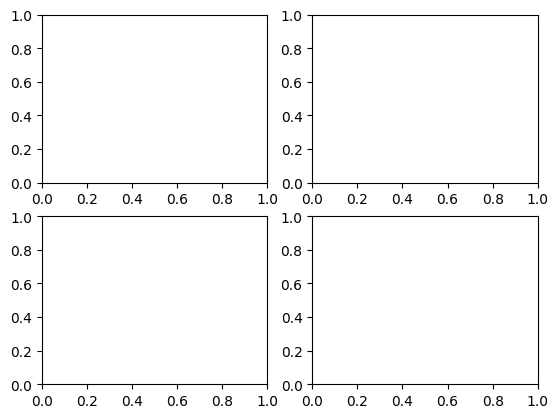

In [35]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1) 
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

In [36]:
category_names1 =da1.columns.values.tolist() 
category_names1

['Prevotella',
 'Klebsiella',
 'Enterobacter',
 'Peptostreptococcus',
 'Streptococcus',
 'Neisseria',
 'Stomatobaculum',
 'Bacillus',
 'Actinomyces',
 'Veillonella',
 'Morococcus',
 'Porphyromonas',
 'Capnocytophaga',
 'Gemella',
 'Dialister',
 'Campylobacter',
 'Others']

In [37]:
results1= da1.T.to_dict('list') 
results1

{'HC-3-pre': [0.27331934190669943,
  0.0,
  0.0,
  0.05063583644011095,
  0.0024451932899102365,
  0.030766200524512333,
  0.009479395049076744,
  0.0036215825126119693,
  0.16854851327121326,
  0.010077911462653901,
  0.002776962859406195,
  0.054752356312389804,
  0.023309924997896993,
  0.06672857217695169,
  0.010654506775180067,
  0.01809323986662158,
  0.2747904625547648],
 'HC-2-pre': [0.2719240042775095,
  0.000292479479087079,
  0.00022106729204883258,
  0.0,
  0.001660465593430042,
  0.12040501818613114,
  0.055082669266116276,
  0.0,
  0.054250263055013126,
  0.015675722525451862,
  0.0,
  0.007874602315477493,
  0.029577053445076273,
  0.0401102130386533,
  0.0199431584290179,
  0.01322675599146812,
  0.369756527105519],
 'HC-1-pre': [0.12190509637594044,
  6.404093680862092e-05,
  0.0,
  0.00220682119272481,
  0.0008534853865967561,
  0.0922090889248072,
  0.002080386258508463,
  0.343902822745918,
  0.027476191820308176,
  0.03334242613462775,
  0.005863319835170337,
  0.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17528\3753374313.py:44: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17528\3753374313.py:58: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17528\3753374313.py:74: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17528\3753374313.py:93: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


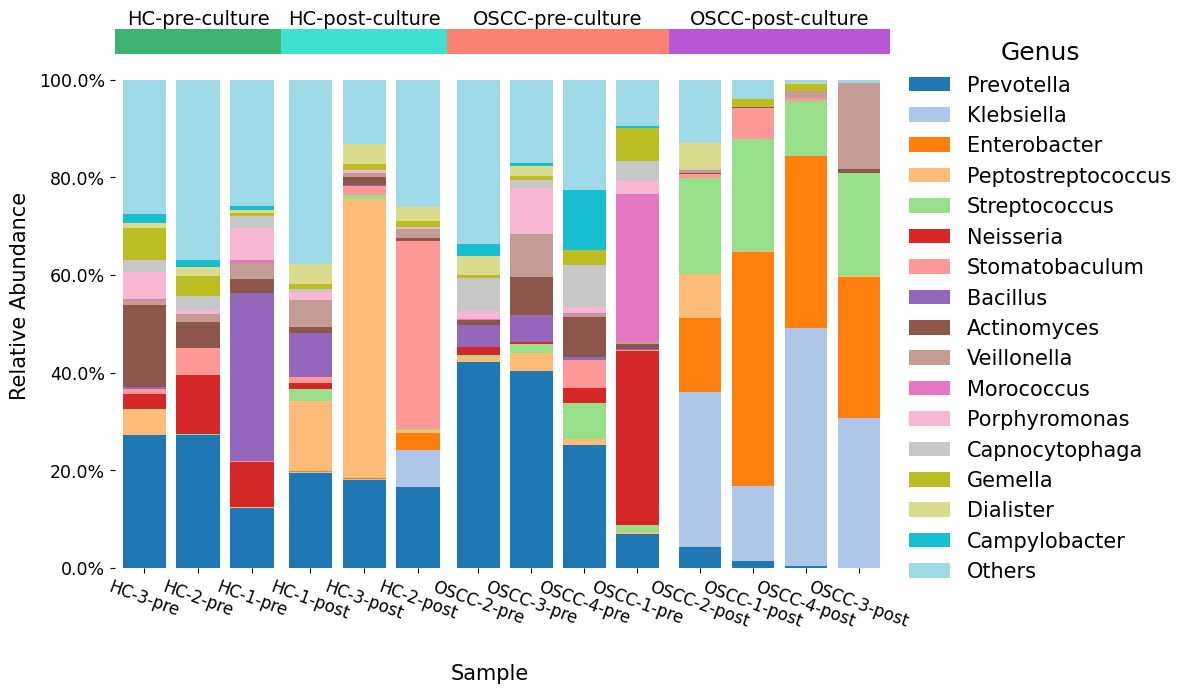

In [67]:
from matplotlib import ticker
from matplotlib.gridspec import GridSpec
fig = plt.figure(1)
gs = GridSpec(2, 14, height_ratios=[0.05, 0.98], figure=fig)
# 创建子图  
ax0 = plt.subplot(gs[0, :])          # 第一行，占据所有14列  
ax1 = plt.subplot(gs[1, 0:3])        # 第二行，前3列  
ax2 = plt.subplot(gs[1, 3:6])        # 第二行，第4到6列  
ax3 = plt.subplot(gs[1, 6:10])       # 第二行，第7到10列  
ax4 = plt.subplot(gs[1, 10:14])      # 第二行，第11到14列  
# 分组标签及其颜色
groups = ['HC-pre-culture', 'HC-post-culture', 'OSCC-pre-culture', 'OSCC-post-culture']
group_colors = ['mediumseagreen',  'turquoise', 'salmon','mediumorchid']
group_sizes = [3, 3, 4, 4]  # 每个分组中的样本数

ax0.set_xlim(0, sum(group_sizes))
ax0.set_ylim(0, 1)
start = 0
for color, size in zip(group_colors, group_sizes):
    ax0.barh(0.5, size, left=start, height=1, color=color)
    start += size
ax0.axis('off')

start = 0
for group, size in zip(groups, group_sizes):
    center = start + size / 2
    ax0.text(center, 1.4, group, ha='center', va='center', fontsize=14)
    start += size

labels1 = list(results1.keys())
datam1 = np.array(list(results1.values()))
data_cum1 = datam1.cumsum(axis=1) 
category_colors1 = plt.get_cmap('tab20')(np.linspace(0,1, datam1.shape[1]))
for i, (colname, color) in enumerate(zip(category_names1, category_colors1)):
    heights1 = datam1[:, i]
    starts1 = (data_cum1[:, i] - heights1)
    ax1.bar(labels1, heights1, bottom=starts1, width=0.8,label=colname, color=color)
max_height1 = datam1.max()  # Get the maximum height among all bars


for tick in ax1.get_xticklabels():
    tick.set_fontsize(12)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()
category_names2 =da2.columns.values.tolist() 
results2= da2.T.to_dict('list') 
labels2 = list(results2.keys())
datam2 = np.array(list(results2.values()))
data_cum2 = datam2.cumsum(axis=1) 
category_colors2 = plt.get_cmap('tab20')(np.linspace(0,1, datam2.shape[1]))
for i, (colname, color) in enumerate(zip(category_names2, category_colors2)):
    heights2 = datam2[:, i]
    starts2 = (data_cum2[:, i] - heights2)
    ax2.bar(labels2, heights2, bottom=starts2, width=0.8,label=colname, color=color)
for tick in ax2.get_xticklabels():
    tick.set_fontsize(12)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()

category_names3 =da3.columns.values.tolist() 
results3= da3.T.to_dict('list') 
labels3 = list(results3.keys())
datam3 = np.array(list(results3.values()))
data_cum3 = datam3.cumsum(axis=1) 
category_colors3 = plt.get_cmap('tab20')(np.linspace(0,1, datam3.shape[1]))
for i, (colname, color) in enumerate(zip(category_names3, category_colors3)):
    heights3 = datam3[:, i]
    starts3 = (data_cum3[:, i] - heights3)
    ax3.bar(labels3, heights3, bottom=starts3, width=0.8,label=colname, color=color)
for tick in ax3.get_xticklabels():
    tick.set_fontsize(12)

ax3.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()

category_names4 =da4.columns.values.tolist() 
results4= da4.T.to_dict('list') 
labels4 = list(results4.keys())
datam4 = np.array(list(results4.values()))
data_cum4 = datam4.cumsum(axis=1) 
category_colors4 = plt.get_cmap('tab20')(np.linspace(0,1, datam4.shape[1]))
for i, (colname, color) in enumerate(zip(category_names4, category_colors4)):
    heights4 = datam4[:, i]
    starts4 = (data_cum4[:, i] - heights4)
    ax4.bar(labels4, heights4, bottom=starts4, width=0.8,label=colname, color=color)
for tick in ax4.get_xticklabels():
    tick.set_fontsize(12)
#横坐标标题sample变大居中
fig.text(0.5, -0.05, 'Sample', ha='center', fontsize=15)
#纵坐标标题Relative Abundance变大
fig.text(0.02, 0.5, 'Relative Abundance', va='center', rotation='vertical', fontsize=15)
ax4.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()
lines, labels = fig.axes[-1].get_legend_handles_labels()
#y轴坐标字体变大
ax1.tick_params(axis='y', labelsize=12.5) 
#将ax3纵坐标的100.0%对齐到ax1的纵坐标的100.0%
ax1.set_ylim(ax3.get_ylim())
ax2.set_ylim(ax3.get_ylim())
ax4.set_ylim(ax3.get_ylim())
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax3.set_ylim(0,1)
ax4.set_ylim(0,1)
#去除ax2的纵坐标数值
ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([])

fig.legend(lines, labels, frameon=False,bbox_to_anchor=(1.2,0.89),prop = {'size':15},title='Genus',title_fontsize='18',fontsize='12.5')


#增加每个子图的横向大小
fig.set_size_inches(10, 7)
# 调整子图之间的间距  
plt.subplots_adjust(wspace=0.0, hspace=0.1)  # hspace 设置为 0.3，根据需要调整  
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=-20)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=-20)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=-20)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=-20)

for ax in [ax3, ax4]:  
    labels = ax.get_xticklabels()  
    for label in labels:  
        label.set_rotation(-20)  # Rotate the labels  
        # Adjust the x position slightly  
        x, y = label.get_position()  # Get the current position  
        label.set_x(x + 0.5)  # Move right by 0.1 (adjust as needed) 
for ax in [ax1, ax2, ax3, ax4]:
    for spine in ax.spines.values():
        spine.set_visible(False)
#保存为pdf格式
plt.savefig('Genus3.pdf',dpi=300,bbox_inches='tight')
plt.show()